# Planetary image plotting in FITS

In [1]:
from    astropy.io import fits
import  matplotlib.pyplot  as plt
import  wget
import  os
from    pathlib import Path
import  numpy  as np

In [2]:
filename = 'saturn.fit'
url      = 'https://web.njit.edu/~gary/322/download/' + filename
    
download_path = str(Path.home() / "Downloads")

if ( os.path.isfile(download_path + '/' + filename) ):
    print( download_path + '/' + filename + "File already exist")
else:     
    print("Downloading file ...") 
    download_file  = wget.download(url, out=download_path)
    print("\nDownload complete")



100% [............................................................................] 783360 / 783360
Download complete


Type: <class 'numpy.ndarray'>
Dimension: (510, 765)


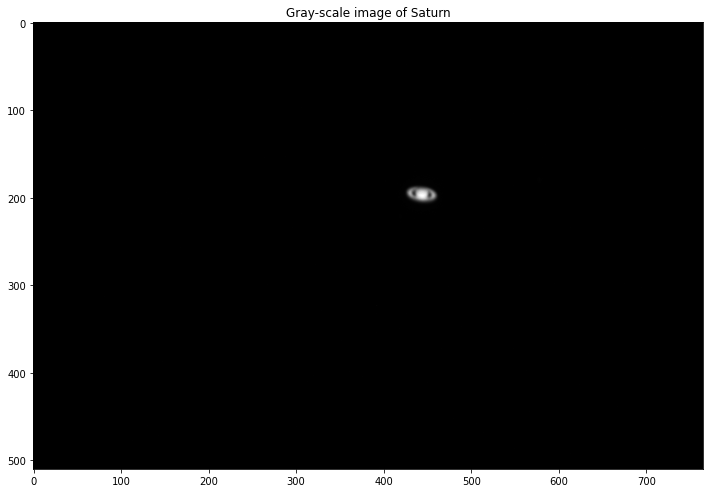

In [3]:
os.chdir(download_path)
raw_image = fits.open('saturn.fit')[0].data

print ("Type:", type (raw_image))
print ("Dimension:", raw_image.shape)

fig  = plt.figure (figsize = (12, 12))
#plt.tight_layout()
plt.imshow(raw_image, cmap='gray')

plt.title("Gray-scale image of Saturn")
plt.show()

#### Zoom in to the Saturn image
The following code zooms in the part of the pixel array where the Saturn image is located.

New imgae shape: (40, 44)


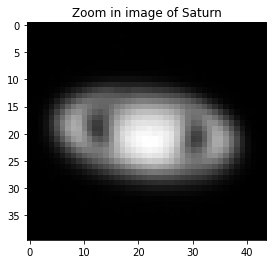

In [4]:
# approximate location of the Saturn 
sat_X = 444
sat_y = 196

saturn = raw_image [sat_y-20:sat_y+20, sat_X-22:sat_X+22]
print ("New imgae shape:", saturn.shape)

plt.imshow(saturn, cmap='gray')
plt.title("Zoom in image of Saturn")
plt.show()

#### Scaling values for the image

The actual NumPy array values are scaled and printed

In [5]:
print ("Min:", saturn.min(), "Max:", saturn.max())

dummy = [ print (*(saturn[i]*10./saturn.max()).astype(int)) for i in range( len(saturn))]

Min: 107 Max: 12546
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 

#### Color schemes for image

Three different colour maps are used in the following plots 

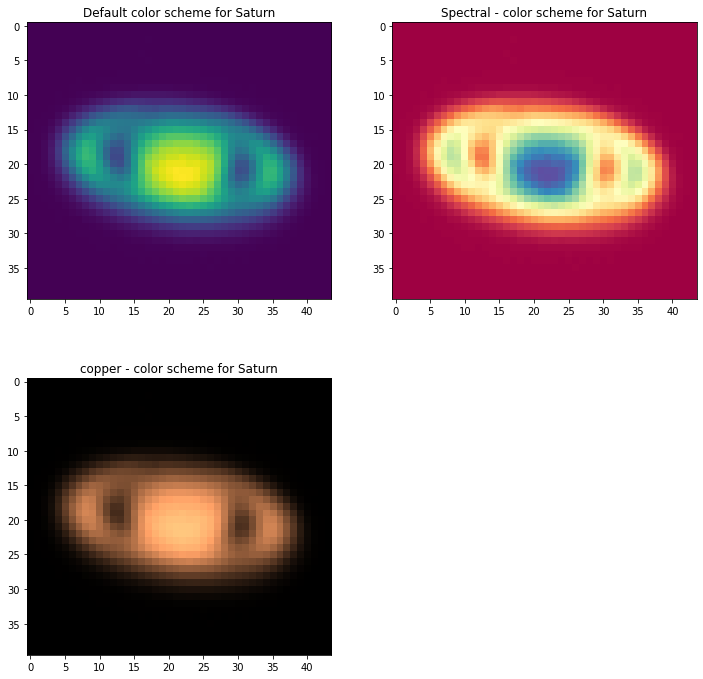

In [6]:
fig  = plt.figure (figsize = (12, 12))
fig.add_subplot(221)
plt.imshow(saturn) 
plt.title("Default color scheme for Saturn")

fig.add_subplot(222)
plt.imshow(saturn, cmap='Spectral')   
plt.title("Spectral - color scheme for Saturn")

fig.add_subplot(223) 
plt.imshow(saturn, cmap='copper')   
plt.title("copper - color scheme for Saturn")
plt.show()

#### Noise in the image
The following two plots show the effect of noise in the plot. </br>
The plot on the left is the original image.
The plot of the right has values clipped between 50 and 150.

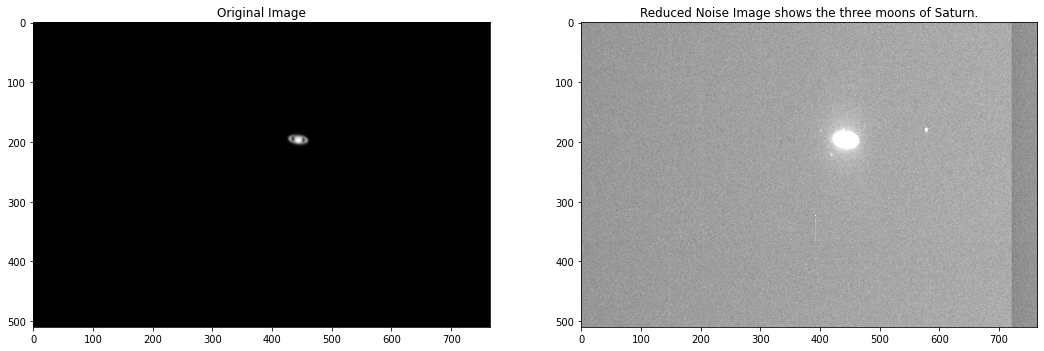

In [7]:
fig  = plt.figure (figsize = (18, 14))

fig.add_subplot(221)
plt.title("Original Image")
plt.imshow(raw_image, cmap='gray')
fig.add_subplot(222)
plt.title("Reduced Noise Image shows the three moons of Saturn.")
plt.imshow(raw_image,cmap='gray',vmin=50,vmax=150)
plt.show()

Next, the last 50 lines of the image are copied, and the plot shows the noise in one of the rows.

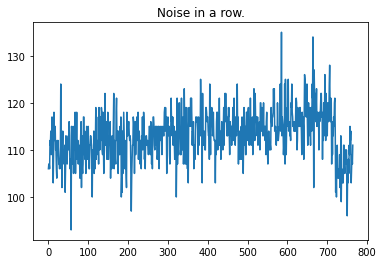

In [8]:
noise = raw_image[0:50,:]  
plt.figure()       # Make a new blank figure
plt.plot(noise[0]) # 
plt.title("Noise in a row.")
plt.show()

#### Statistical information about the Noise

Mean: 113.08640522875817
Standard deviation: 5.336561353307926
STD of the mean noise in each column: 2.890463611270212


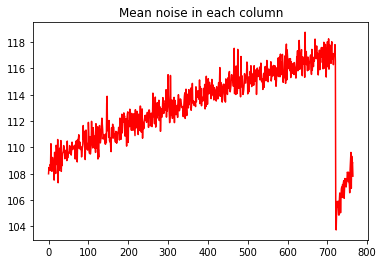

In [9]:
print ("Mean:", np.mean(noise))
print ("Standard deviation:", np.std(noise) )

# Next, take the average noise in each column and plot
avg_noise = np.mean(noise,0)
print ("STD of the mean noise in each column:", np.std(avg_noise) )
plt.title ("Mean noise in each column")
plt.plot(avg_noise,'r')
plt.show()

The figure above shows that the noise increases from left to right columns. 
This skews the noise measurement.

Next, the average noise values are used to create a linear model.
Afterwards, the values are predicted.
The plot on the left shows the difference between noise and predicted values.
While the plot on the right shows the difference between average noise and predicted values. 

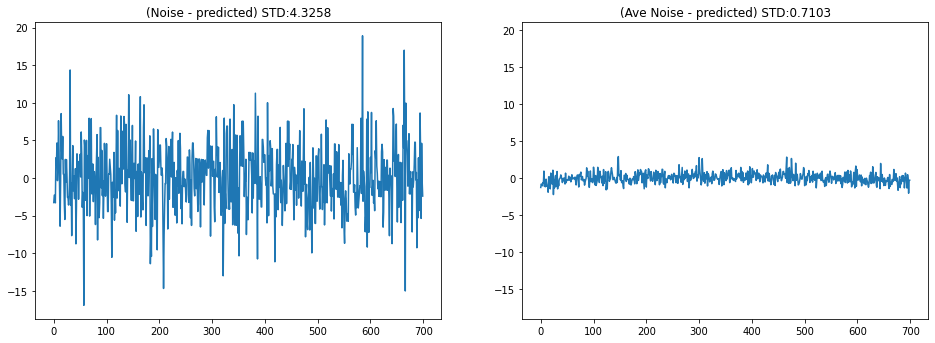

In [19]:
model = np.polyfit(np.arange(700),avg_noise[:700],1)
predicted = np.polyval(model,np.arange(700))

fig  = plt.figure (figsize = (16, 12))
fig.add_subplot(221)
plt.title("(Noise - predicted) STD:" + str(  round (np.std(noise[0,:700] - predicted), 4)  ) )
plt.plot(np.arange(700),noise[0,:700] - predicted)

fig.add_subplot(222)
plt.plot(np.arange(700),avg_noise[:700] - predicted)
plt.title("(Ave Noise - predicted) STD:" + str(  round (np.std(avg_noise[:700] - predicted) , 4)  ) )
plt.ylim(-19, 21)
plt.show()